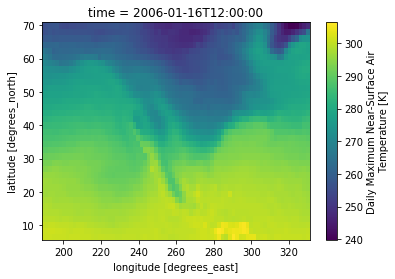

In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
# The dodsC link for the test file
dap = 'https://pavics.ouranos.ca/twitcher/ows/proxy/thredds/dodsC/'
ncfile = 'birdhouse/testdata/flyingpigeon/cmip5/tasmax_Amon_MPI-ESM-MR_rcp45_r1i1p1_200601-200612.nc'

# Here we open the file and subset it using xarray fonctionality, which communicates directly with 
# the OPeNDAP server to retrieve only the data needed. 
ds = xr.open_dataset(dap+ncfile)
tas = ds.tasmax
subtas = tas.sel(time=slice('2006-01-01', '2006-03-01'), lon=slice(188,330), lat=slice(6, 70))
subtas.isel(time=0).plot()
plt.show()

In [2]:
from birdy import WPSClient
url = 'https://pavics.ouranos.ca/twitcher/ows/proxy/flyingpigeon/wps'
fp = WPSClient(url)

/usr/local/anaconda/anaconda2/envs/birdy/lib/python2.7/site-packages/birdhouse_birdy-0.5.1-py2.7.egg/birdy/dependencies.py:20: IPythonWarning: Jupyter Notebook is not supported. Please install *ipywidgets*.
  warnings.warn('Jupyter Notebook is not supported. Please install *ipywidgets*.', IPythonWarning)


In [3]:
help(fp.subset_continents)

Help on method subset_continents in module birdy.client.base:

subset_continents(self, region='Africa', mosaic=None, resource=None) method of birdy.client.base.WPSClient instance
    Return the data whose grid cells intersect the selected continents for each input dataset.
    
    Parameters
    ----------
    region : {'Africa', 'Asia', 'Australia', 'North America', 'Oceania', 'South America', 'Antarctica', 'Europe'}string
        Continent name.
    mosaic : boolean
        If True, selected regions will be merged into a single geometry.
    resource : ComplexData:mimetype:`application/x-netcdf`, :mimetype:`application/x-tar`, :mimetype:`application/zip`
        NetCDF Files or archive (tar/zip) containing netCDF files.
    
    Returns
    -------
    output : ComplexData:mimetype:`application/x-tar`
        Tar archive of the subsetted netCDF files.
    ncout : ComplexData:mimetype:`application/x-netcdf`
        NetCDF file with subset for one dataset.
    output_log : ComplexData

In [4]:
thredds = 'https://pavics.ouranos.ca/twitcher/ows/proxy/thredds/fileServer/'
ncfile = 'birdhouse/testdata/flyingpigeon/cmip5/tasmax_Amon_MPI-ESM-MR_rcp45_r1i1p1_200601-200612.nc'
resp = fp.subset_continents(resource=thredds+ncfile, region='Africa')

In [5]:
resp.get()
tar_out, nc_out, log = resp.get(asobj=True)

/usr/local/anaconda/anaconda2/envs/birdy/lib/python2.7/site-packages/birdhouse_birdy-0.5.1-py2.7.egg/birdy/client/outputs.py:65: UserWarning: No converter was found for mime type: application/x-tar
  warnings.warn(UserWarning("No converter was found for mime type: {}".format(output.mimeType)))


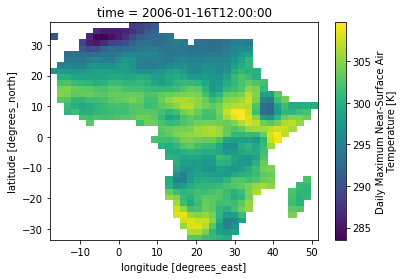

In [6]:
import xarray as xr
ds = xr.open_dataset(xr.backends.NetCDF4DataStore(nc_out))
ds.tasmax.isel(time=0).plot()